# WORD CLOUD PROJECT

For this project, you'll create a "word cloud" from a text by writing a script. This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words. A dictionary is the output of the calculate_frequencies function. The wordcloud module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only. For the text itself, you can copy and paste the contents of a website you like. Or you can use a site like [Project Gutenberg](https://www.gutenberg.org) to find books that are available online. You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import io
import sys

In [2]:
path = "wordclouddata.txt"                                    #copy the path of the file here
file1 = open(path, 'r')
file_contents = file1.read()

Hints: 
1.   split() function for splitting the words
2.   isalpha() for detecting a non-alphabetical character
3.   the format of dictionary: keys = word , value = frequency of the word



In [3]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "for", "on", "in"]
    
    # TYPE YOUR MAIN CODE HERE
    frequencies = {}
    for line in file_contents :
        line=line.rstrip()
        words=line.split()
        for word in words:
            if word in punctuations or  word in uninteresting_words :
                pass 
            else:
                if len(word)>=2:
                    frequencies[word]=frequencies.get(word,0)+1
                
                
    
    clean_text = ""
    for index, char in enumerate(file_contents):
      if char.isalpha() == True or char.isspace():
        clean_text += char 
            
    words = clean_text.split()
    
    filter_words = [word.lower() for word in words if word.lower() not in uninteresting_words]
    
    for item in filter_words:
      if item not in frequencies:
        frequencies[item] = 1
      frequencies[item] += 1 

    #wordcloud
    cloud = wordcloud.WordCloud(width=2160, height=1080)
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

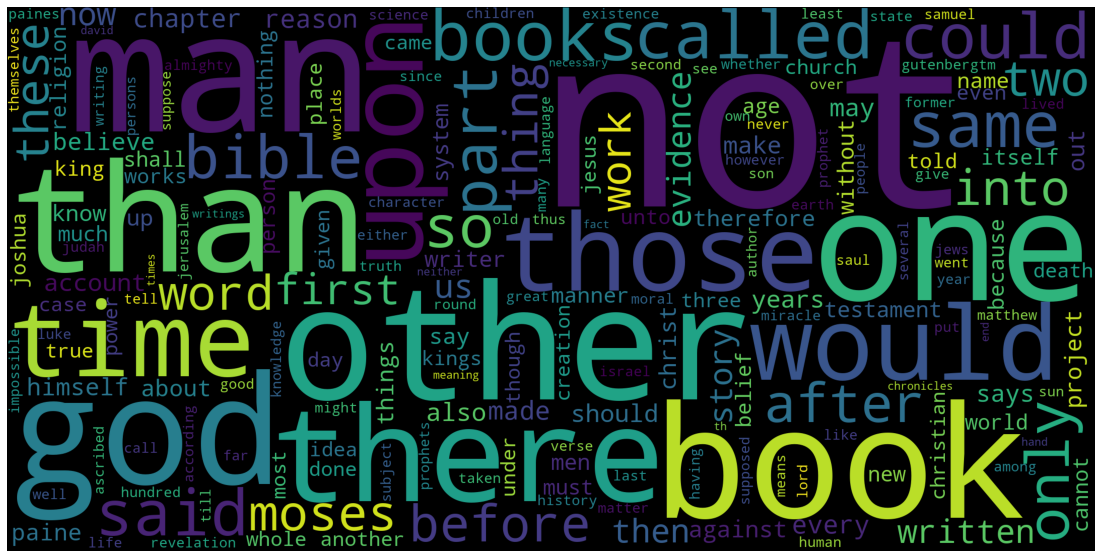

In [4]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.figure(figsize=(20,10))
plt.imshow(myimage)
plt.axis('off')
name = "Prashant"                                  # TYPE YOUR NAME HERE
plt.savefig("{}.jpeg".format(name))
plt.show()